<a href="https://colab.research.google.com/github/AbhishekKaushikCV/HCI/blob/main/Transition_Matrix/Transition_matrix_7711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Transition matrix:
## Task:
- To show a transition between the apps( we have 'n' applications)
- Count it along all the other apps
- Store it in the form of a matrix (n*n matrix)

- Name of apps on x and y axis
- For example: if a current app is 'n0' : i have to find how many times there is a switch between n0 to all other apps



In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload the data(9815) from csv file

app_data = pd.read_csv('app_data.csv')

In [50]:
# Sort the values by timeDate
app_data = app_data.sort_values(by=['timeDate'],ignore_index=True)
app_data

,name,time,timeDate
0,com.huawei.android.launcher,453886603627243,09.08.2019 00:19:53.046
1,com.google.android.gm,453888156162139,09.08.2019 00:19:54.598
2,com.huawei.android.launcher,453933167223590,09.08.2019 00:20:39.609
3,ch.ethz.inf.vs.staals.visualattentionrecorder,453933673994423,09.08.2019 00:20:40.116
4,com.google.android.gm,453936877236089,09.08.2019 00:20:43.319
...,...,...,...
730,ch.ethz.inf.vs.staals.visualattentionrecorder,1194522518849319,23.08.2019 22:18:12.193
731,com.huawei.android.launcher,1194536550817025,23.08.2019 22:18:26.225
732,com.contextlogic.wish,1194537057995671,23.08.2019 22:18:26.733
733,com.huawei.android.launcher,1194725318710747,23.08.2019 22:21:34.993


In [47]:
# Unique app names used by the participant
unique_apps= app_data.name.unique()

In [48]:
n = len(unique_apps)
print(n)

36


In [49]:
# Change  the string app name to integer
app_names = app_data.name.unique() # Different app names used in the data
changed_names = list(range(n)) # New app names
print(changed_names)

n_app_data = app_data.replace(to_replace=app_names,value=changed_names) # Replace old names by new namesprint(app_data)
n_app_data.head(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


,name,time,timeDate
0,0,453886603627243,09.08.2019 00:19:53.046
1,1,453888156162139,09.08.2019 00:19:54.598
2,0,453933167223590,09.08.2019 00:20:39.609
3,2,453933673994423,09.08.2019 00:20:40.116
4,1,453936877236089,09.08.2019 00:20:43.319
5,0,453958819479836,09.08.2019 00:21:05.261
6,3,453963946712648,09.08.2019 00:21:10.389
7,0,453972101150667,09.08.2019 00:21:18.543
8,2,453975674144938,09.08.2019 00:21:22.116
9,0,453978229390771,09.08.2019 00:21:24.671


In [51]:
# Total tranisitions by the participant

transitions = n_app_data.name
transitions = transitions.astype(np.int8) # Convert to type int8

In [52]:
# Create a transition matrix

def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    return M

In [53]:
# Create a probablity transition matrix

def p_transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

#test:

#t = [1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]


In [ ]:
# Create the tansition matrix
t_matrix = transition_matrix(transitions)
for row in t_matrix: print(' '.join('{0:0}'.format(x) for x in row))

In [ ]:
# Probablity matrix
p_matrix = p_transition_matrix(transitions)
for row in p_matrix: print(' '.join('{0:0}'.format(x) for x in row))

In [56]:
# to check the correctness
total=sum(map(sum, t_matrix))
print(total)

734


In [57]:
# Convert the transition matrix to a numpy array for the heatmap
arr = np.array(t_matrix)

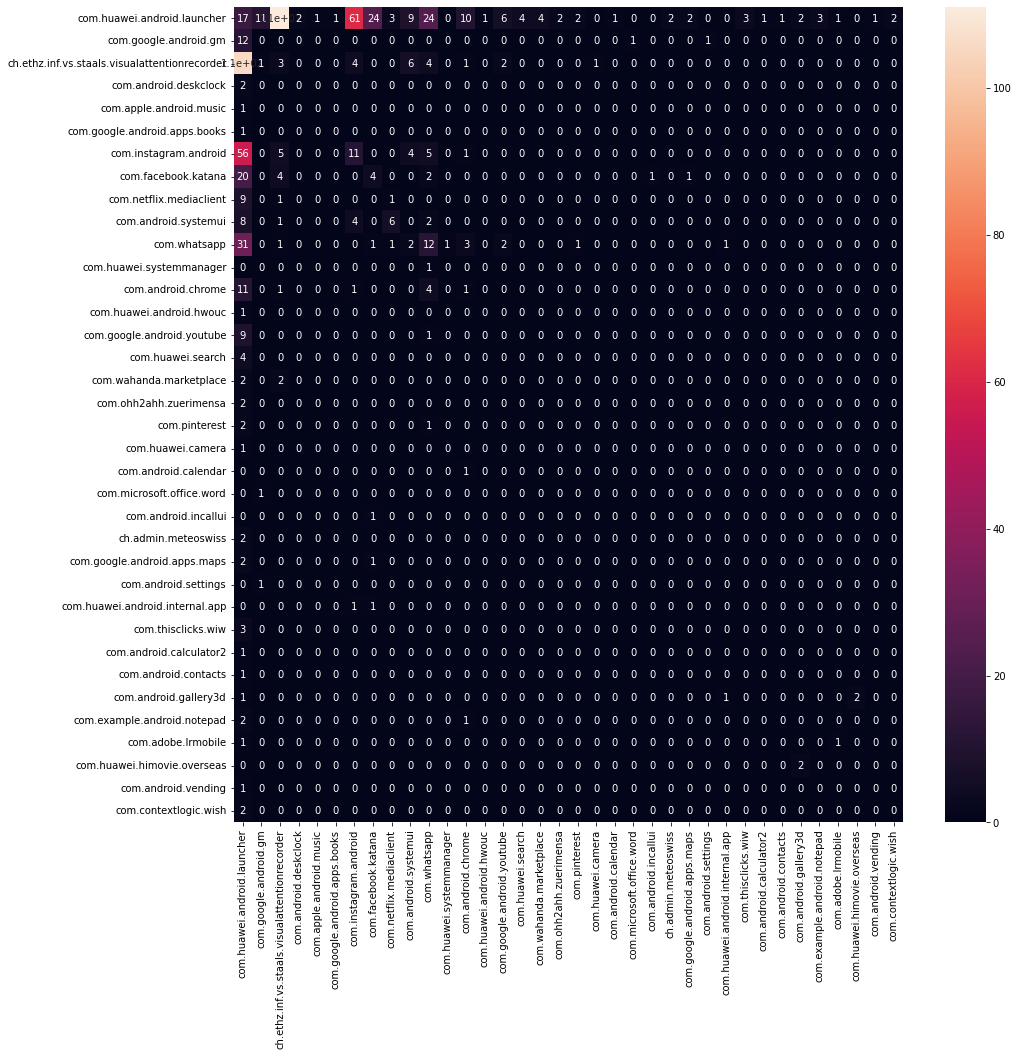

In [59]:
# Plot the heatmap using the above matrix
plt.figure(figsize=(15,15))
ax = sns.heatmap(arr,annot=True,xticklabels=unique_apps,yticklabels=unique_apps)
plt.savefig('7711_transition.png',bbox_inches='tight')

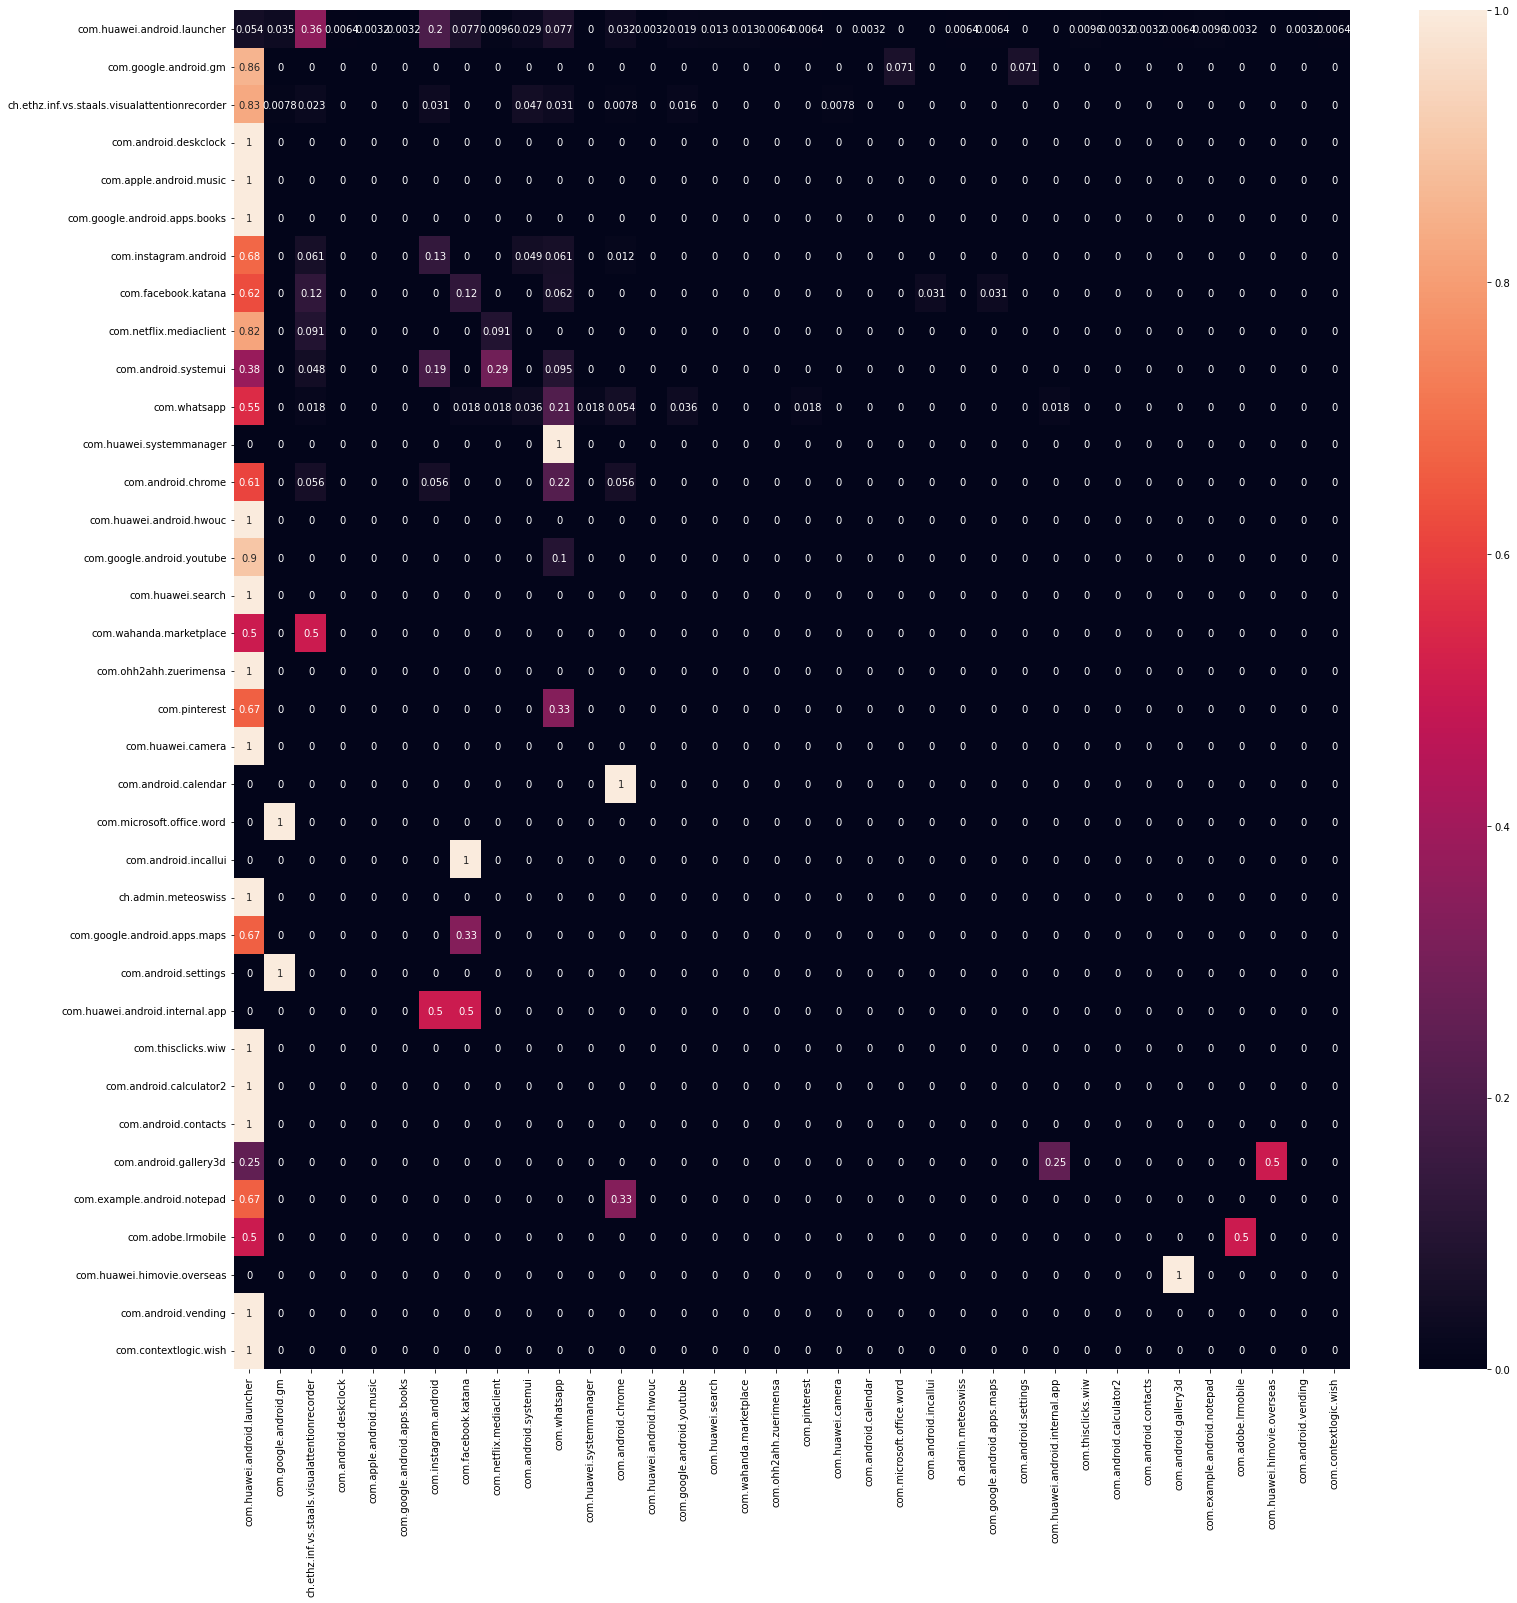

In [60]:
# Probablity heatmap

p_arr = np.array(p_matrix)
plt.figure(figsize=(25,25))
ax = sns.heatmap(p_arr,annot=True,xticklabels=unique_apps,yticklabels=unique_apps)
plt.savefig('7711_probablity.png',bbox_inches='tight')


### Mask the home app and then create a transition matrix:


In [61]:
app_data

,name,time,timeDate
0,com.huawei.android.launcher,453886603627243,09.08.2019 00:19:53.046
1,com.google.android.gm,453888156162139,09.08.2019 00:19:54.598
2,com.huawei.android.launcher,453933167223590,09.08.2019 00:20:39.609
3,ch.ethz.inf.vs.staals.visualattentionrecorder,453933673994423,09.08.2019 00:20:40.116
4,com.google.android.gm,453936877236089,09.08.2019 00:20:43.319
...,...,...,...
730,ch.ethz.inf.vs.staals.visualattentionrecorder,1194522518849319,23.08.2019 22:18:12.193
731,com.huawei.android.launcher,1194536550817025,23.08.2019 22:18:26.225
732,com.contextlogic.wish,1194537057995671,23.08.2019 22:18:26.733
733,com.huawei.android.launcher,1194725318710747,23.08.2019 22:21:34.993


In [62]:
# Exclude the android launcher app

mask = app_data['name'].isin(['com.huawei.android.launcher'])
m_app_data = app_data[~mask]
m_app_data

,name,time,timeDate
1,com.google.android.gm,453888156162139,09.08.2019 00:19:54.598
3,ch.ethz.inf.vs.staals.visualattentionrecorder,453933673994423,09.08.2019 00:20:40.116
4,com.google.android.gm,453936877236089,09.08.2019 00:20:43.319
6,com.android.deskclock,453963946712648,09.08.2019 00:21:10.389
8,ch.ethz.inf.vs.staals.visualattentionrecorder,453975674144938,09.08.2019 00:21:22.116
...,...,...,...
726,com.android.vending,1194083282722824,23.08.2019 22:10:52.957
728,com.contextlogic.wish,1194101160776988,23.08.2019 22:11:10.835
730,ch.ethz.inf.vs.staals.visualattentionrecorder,1194522518849319,23.08.2019 22:18:12.193
732,com.contextlogic.wish,1194537057995671,23.08.2019 22:18:26.733


In [63]:
m_unique_apps = m_app_data.name.unique()

In [64]:
n = len(m_unique_apps)

In [65]:
# Change  the string app name to integer
app_names = m_app_data.name.unique() # Different app names used in the data
changed_names = list(range(n)) # New app names

m_app_data = m_app_data.replace(to_replace=app_names,value=changed_names) # Replace old names by new names
m_app_data

,name,time,timeDate
1,0,453888156162139,09.08.2019 00:19:54.598
3,1,453933673994423,09.08.2019 00:20:40.116
4,0,453936877236089,09.08.2019 00:20:43.319
6,2,453963946712648,09.08.2019 00:21:10.389
8,1,453975674144938,09.08.2019 00:21:22.116
...,...,...,...
726,33,1194083282722824,23.08.2019 22:10:52.957
728,34,1194101160776988,23.08.2019 22:11:10.835
730,1,1194522518849319,23.08.2019 22:18:12.193
732,34,1194537057995671,23.08.2019 22:18:26.733


In [66]:
# Total tranisitions by the participant

m_transitions = m_app_data.name
m_transitions = m_transitions.astype(np.int8) # Convert to type int8
m_transitions

1       0
3       1
4       0
6       2
8       1
       ..
726    33
728    34
730     1
732    34
734     1
Name: name, Length: 423, dtype: int8

In [ ]:
# Create the tansition matrix
m_t_matrix = transition_matrix(m_transitions)

for row in m_t_matrix: print(' '.join('{0:0}'.format(x) for x in row))

In [68]:
# to check the correctness
total=sum(map(sum, m_t_matrix))
print(total)

422


In [69]:
# Convert the transition matrix to a numpy array for the heatmap
m_arr = np.array(m_t_matrix)

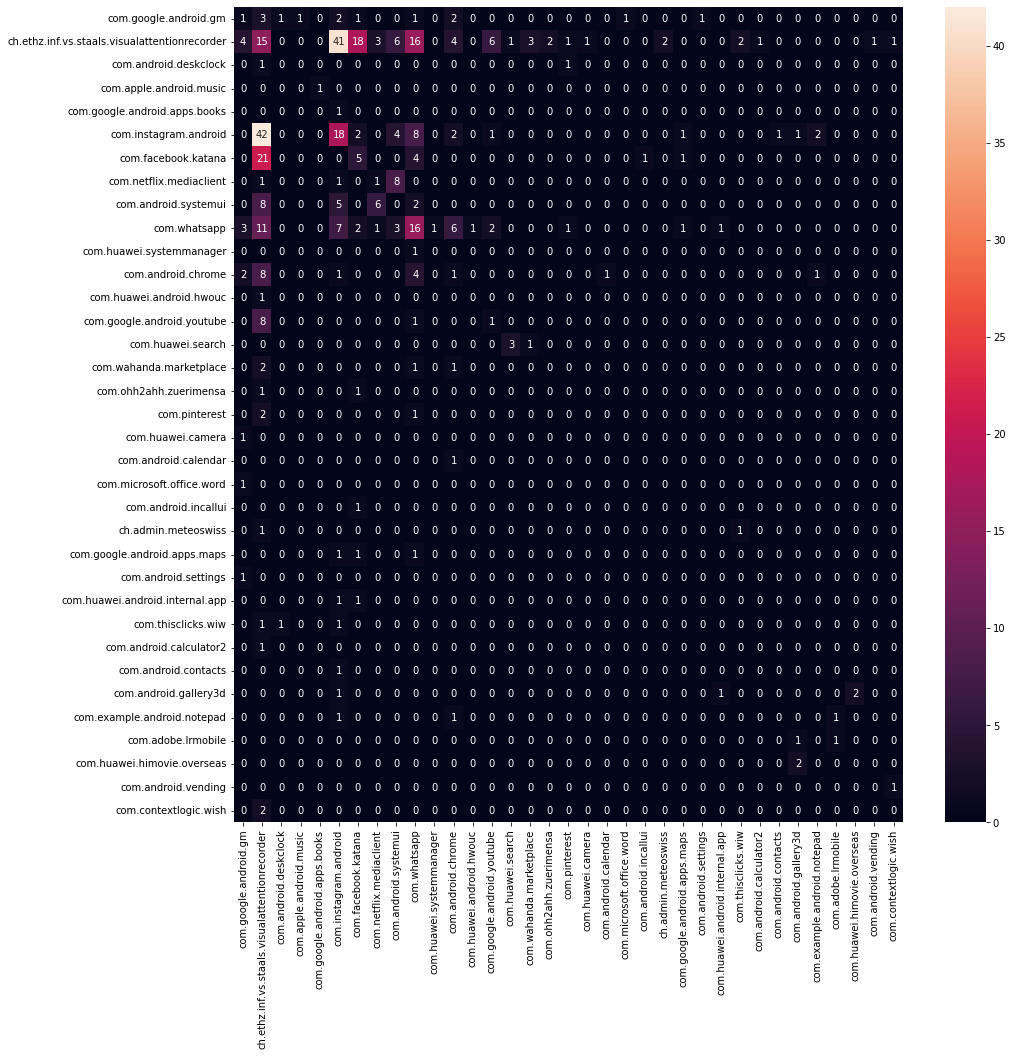

In [70]:
# Plot the heatmap using the above matrix
plt.figure(figsize=(15,15))
ax = sns.heatmap(m_arr,annot=True,xticklabels=m_unique_apps,yticklabels=m_unique_apps)
plt.savefig('7711_Masked_transition.png',bbox_inches='tight')

In [ ]:
# Masked Probablity matrix

p_m_t_matrix = p_transition_matrix(m_transitions)

for row in p_m_t_matrix: print(' '.join('{0:0}'.format(x) for x in row))

In [72]:
# Convert the transition matrix to a numpy array for the heatmap
p_m_arr = np.array(p_m_t_matrix)

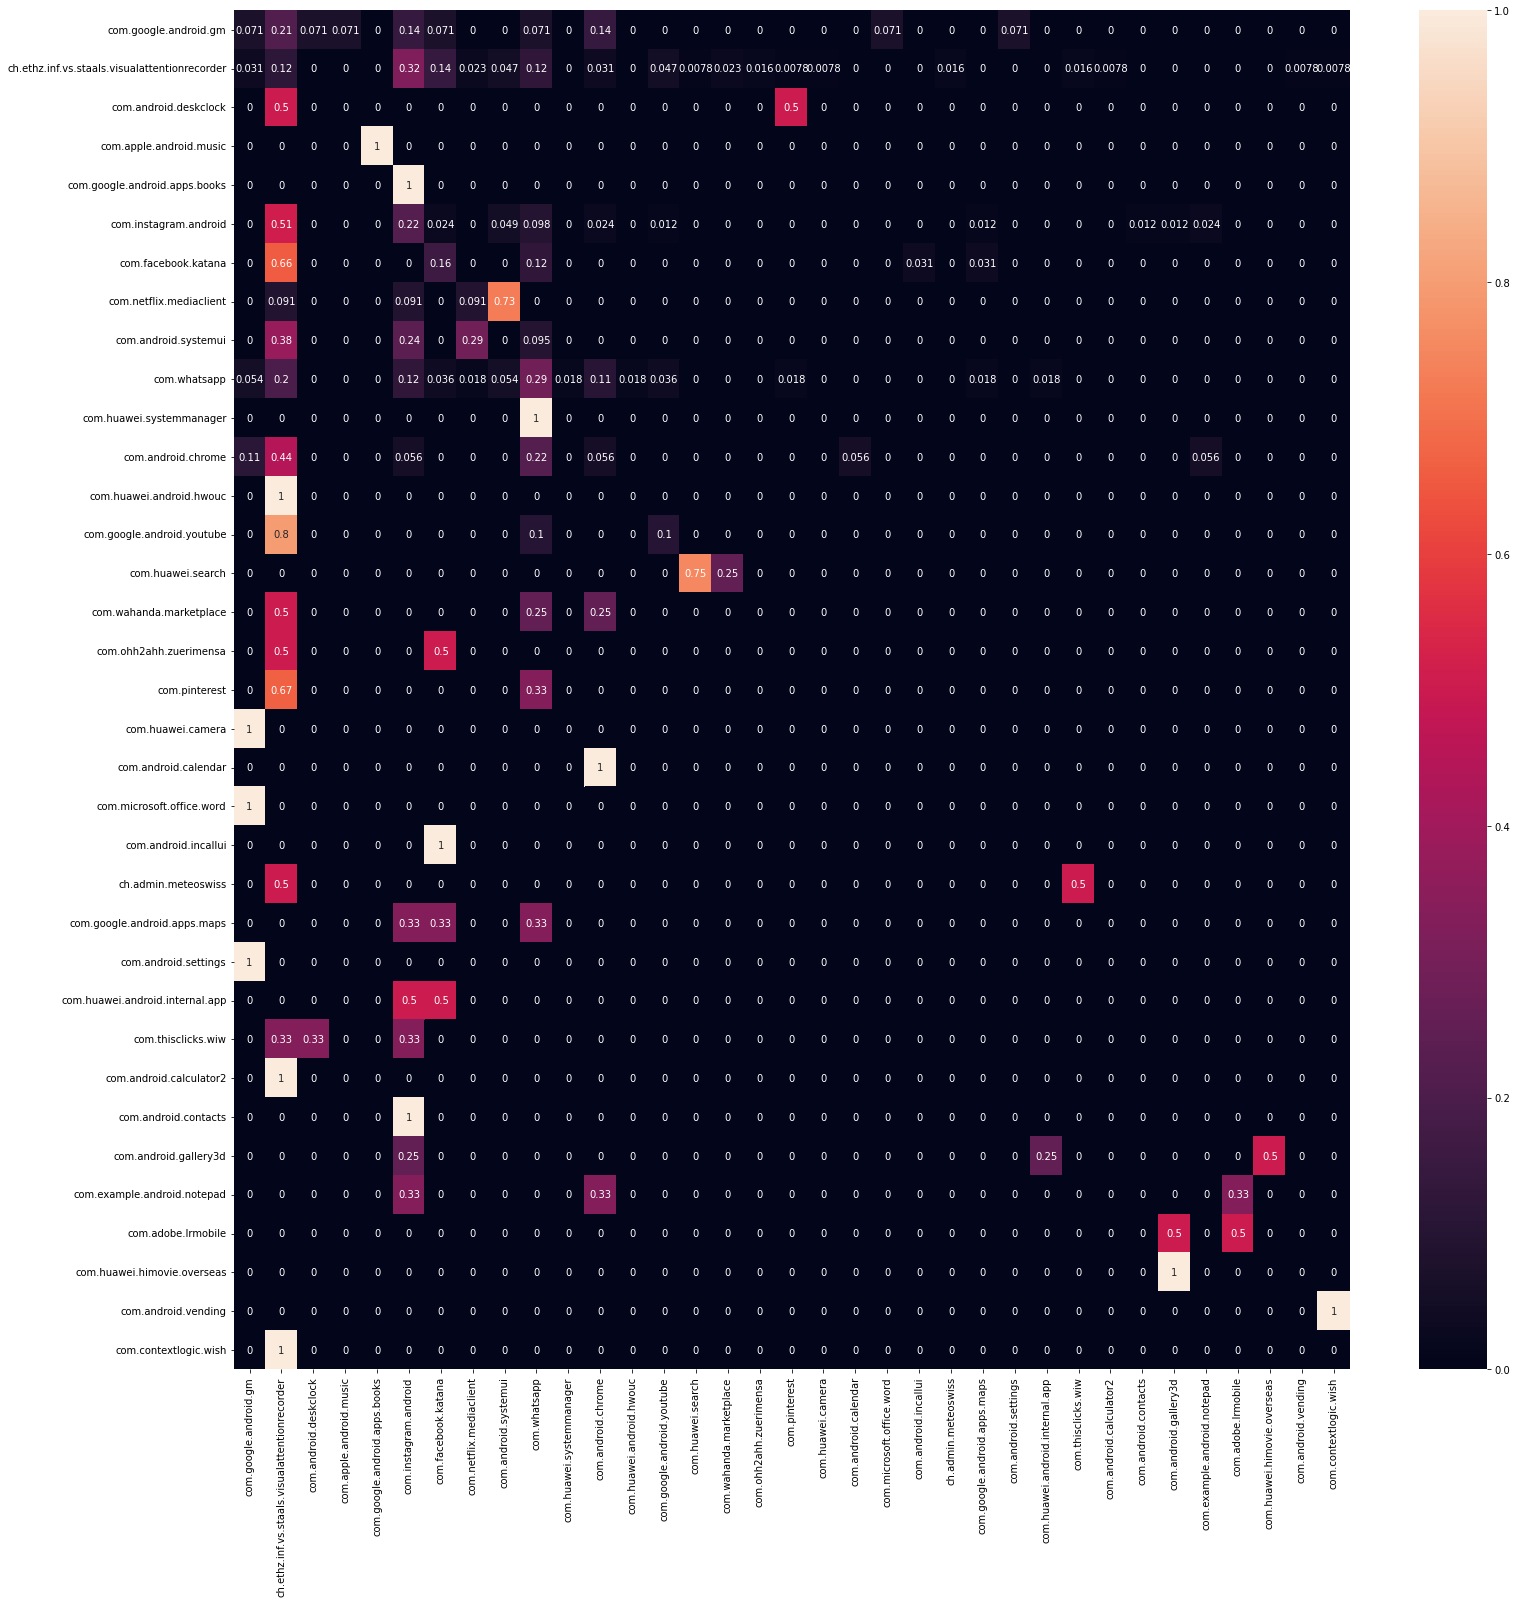

In [73]:
# Plot the heatmap using the above matrix
plt.figure(figsize=(25,25))
ax = sns.heatmap(p_m_arr,annot=True,xticklabels=m_unique_apps,yticklabels=m_unique_apps)
plt.savefig('7711_m_probablity.png',bbox_inches='tight')

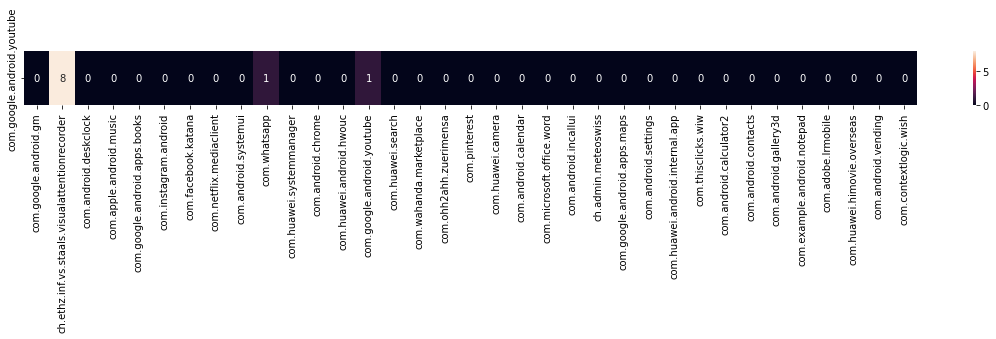

In [96]:
# Transition of only youtube
y_arr = m_arr[13:14,:]
plt.figure(figsize=(20,1))
s_ax = sns.heatmap(y_arr,annot=True,xticklabels=m_unique_apps[:],yticklabels=m_unique_apps[13:14])
plt.savefig('7711_y2all_transition.png',bbox_inches='tight')

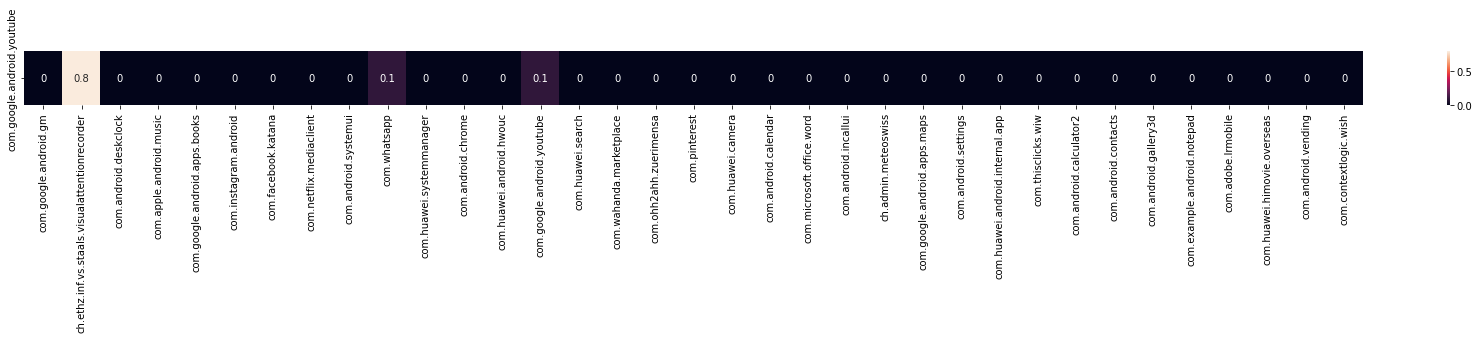

In [75]:
# Probablity of Transition of only youtube
p_y_arr = p_m_arr[13:14,:]
plt.figure(figsize=(30,1))
s_ax = sns.heatmap(p_y_arr,annot=True,xticklabels=m_unique_apps[:],yticklabels=m_unique_apps[13:14])
plt.savefig('7711_m_10_apps_transition.png',bbox_inches = 'tight')

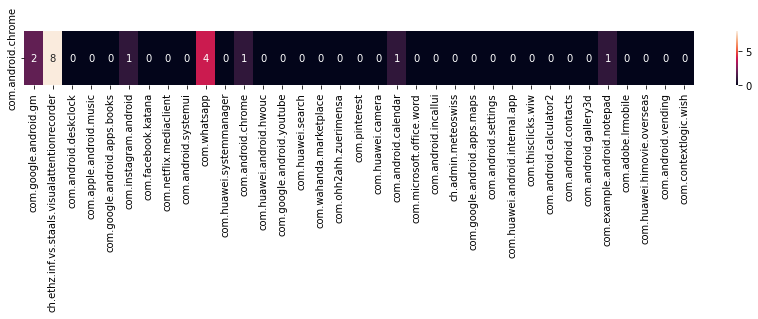

In [97]:
# Transition of only chrome
c_arr = m_arr[11:12,:]
plt.figure(figsize=(15,1))
s_ax = sns.heatmap(c_arr,annot=True,xticklabels=m_unique_apps[:],yticklabels=m_unique_apps[11:12])
plt.savefig('7711_c2all_transition.png',bbox_inches='tight')

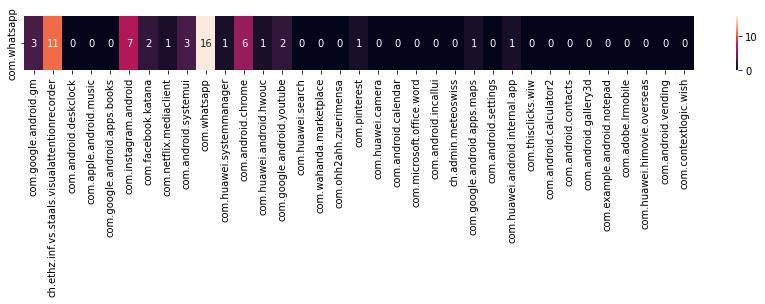

In [98]:
# Transition of only whatsapp
w_arr = m_arr[9:10,:]
plt.figure(figsize=(15,1))
s_ax = sns.heatmap(w_arr,annot=True,xticklabels=m_unique_apps[:],yticklabels=m_unique_apps[9:10])
plt.savefig('7711_w2all_transition.png',bbox_inches='tight')

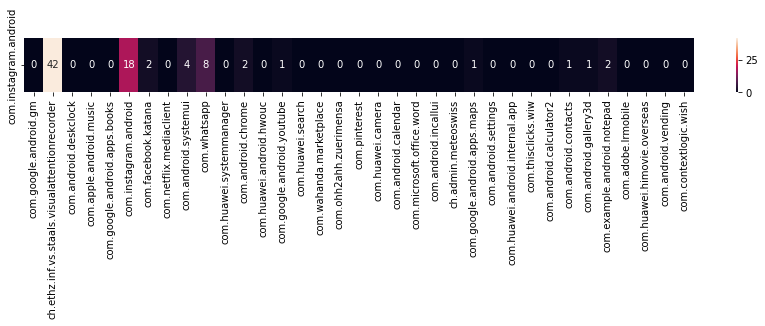

In [99]:
# Transition of only instagram
i_arr = m_arr[5:6,:]
plt.figure(figsize=(15,1))
s_ax = sns.heatmap(i_arr,annot=True,xticklabels=m_unique_apps[:],yticklabels=m_unique_apps[5:6])
plt.savefig('7711_i2all_transition.png',bbox_inches='tight')

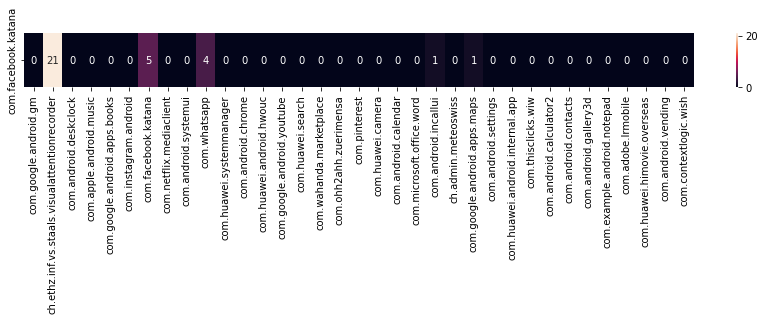

In [100]:
# Transition of only facebook
f_arr = m_arr[6:7,:]
plt.figure(figsize=(15,1))
s_ax = sns.heatmap(f_arr,annot=True,xticklabels=m_unique_apps[:],yticklabels=m_unique_apps[6:7])
plt.savefig('7711_f2all_transition.png',bbox_inches='tight')

In [101]:
apps_arr = np.concatenate((f_arr,y_arr,w_arr,i_arr,c_arr),axis = 0)
apps_arr

array([[ 0, 21,  0,  0,  0,  0,  5,  0,  0,  4,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 3, 11,  0,  0,  0,  7,  2,  1,  3, 16,  1,  6,  1,  2,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0, 42,  0,  0,  0, 18,  2,  0,  4,  8,  0,  2,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  2,  0,
         0,  0,  0],
       [ 2,  8,  0,  0,  0,  1,  0,  0,  0,  4,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0]])

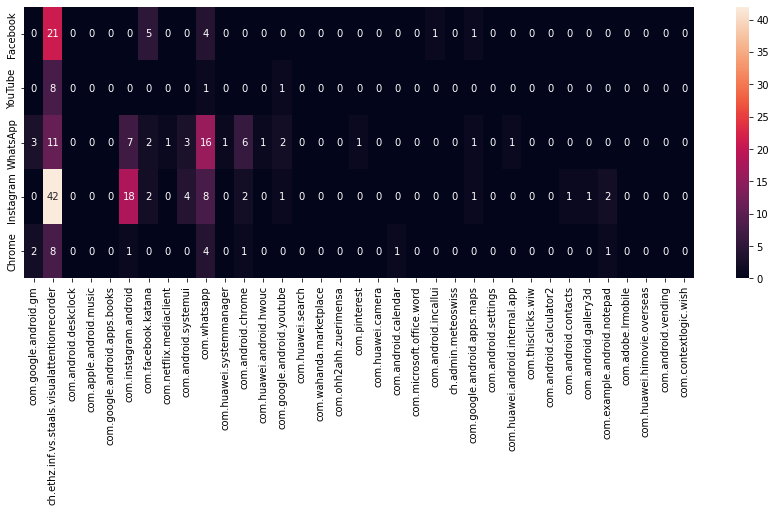

In [104]:
plt.figure(figsize=(15,5))
s_ax = sns.heatmap(apps_arr,annot=True,xticklabels=m_unique_apps[:],yticklabels=['Facebook','YouTube','WhatsApp','Instagram','Chrome'])
#plt.savefig('7711_fywic_transition.png',bbox_inches='tight')